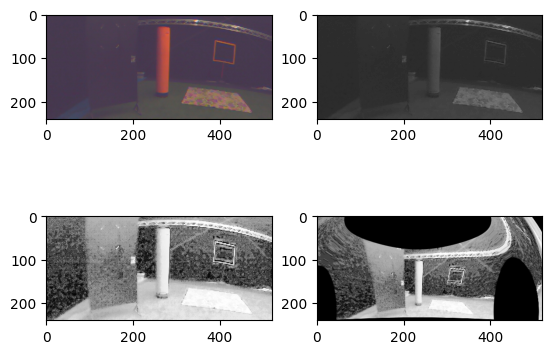

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

image = cv2.imread('./mav_datasets/cyberzoo_poles_panels_mats/img.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
eqhist = cv2.equalizeHist(gray)

camera_matrix = np.array([
    [323.304409,     0.        , 264.18111025],
    [  0.      ,   323.7376457 , 213.45697442],
    [  0.      ,     0.        ,   1.        ]
])
distortion = np.array([-3.42172150e-01,  1.42619049e-01,  6.17693970e-05,  1.79552140e-04, -3.15633945e-02])
h, w = image.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(camera_matrix, distortion, (w, h), 1, (w, h))
dst = cv2.undistort(eqhist, camera_matrix, distortion, None, newcameramtx)

plt.subplot(2, 2, 1)
plt.imshow(image)
plt.subplot(2, 2, 2)
plt.imshow(gray, cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(eqhist, cmap='gray')
plt.subplot(2, 2, 4)
plt.imshow(dst, cmap='gray')


plt.show()

2.037878787878788
2.1666666666666665


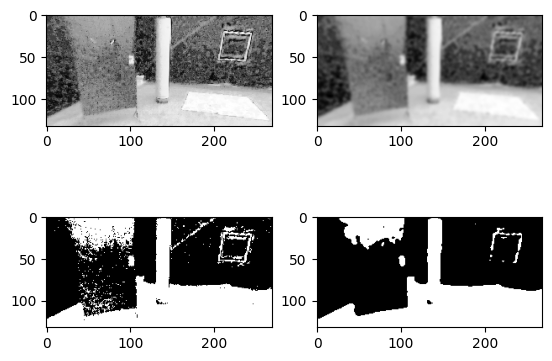

In [4]:
x, y, w_, h_ = roi
print(w_/h_)
print(w/h)
img_roi = dst[y:y+h_, x:x+w_]

img_roi_blur = cv2.GaussianBlur(img_roi, (7, 7), 0)

th, ret = cv2.threshold(img_roi,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
th2, ret2 = cv2.threshold(img_roi_blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


plt.subplot(2, 2, 1)
plt.imshow(img_roi, cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(img_roi_blur, cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(ret, cmap='gray')
plt.subplot(2, 2, 4)
plt.imshow(ret2, cmap='gray')

plt.show()

/tmp/ipykernel_11933/187469042.py:2: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


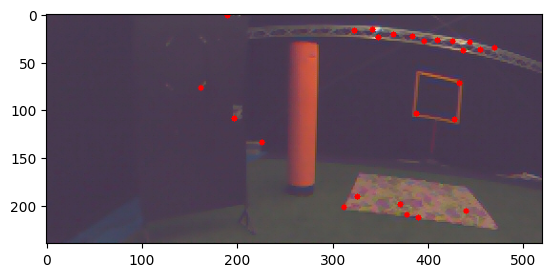

In [5]:
corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(image,(x,y),3,255,-1)
plt.imshow(image)
plt.show()

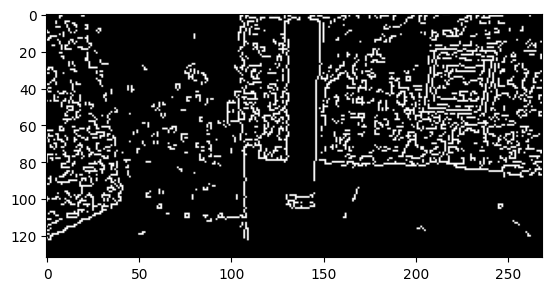

In [6]:
edges = cv2.Canny(img_roi,250,200)
plt.imshow(edges,cmap = 'gray')
plt.show()